<a href="https://www.kaggle.com/code/martinab/breast-cancer-classification?scriptVersionId=114154734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Breast Cancer Classification

######  A small introduction to the dataset:

Breast cancer is the most common malignancy among women. It occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer.

Our dataset was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from each one of the cells in the sample, than it calculates the mean value, extreme value and standard error of each feature for the image, returning a 30 real-valuated vector.

![bcdetection](https://cytecare.com/wp-content/uploads/2020/06/breast-cancer-detection.jpg)

### Importing Data 

In [1]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotly:
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Importing breast cancer dataset:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [3]:
# Check first 5 rows of dataset:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Function to describe variables
def desc(df):
    d = pd.DataFrame(df.dtypes,columns=['Data_Types'])
    d = d.reset_index()
    d['Columns'] = d['index']
    d = d[['Columns','Data_Types']]
    d['Missing'] = df.isnull().sum().values    
    d['Uniques'] = df.nunique().values
    return d

# Apply function on df:
desc(df)

,Columns,Data_Types,Missing,Uniques
0,id,int64,0,569
1,diagnosis,object,0,2
2,radius_mean,float64,0,456
3,texture_mean,float64,0,479
4,perimeter_mean,float64,0,522
5,area_mean,float64,0,539
6,smoothness_mean,float64,0,474
7,compactness_mean,float64,0,537
8,concavity_mean,float64,0,537
9,concave points_mean,float64,0,542


In [5]:
# Preview of diagnosis :
print(df.diagnosis.unique())

['M' 'B']


Our diagnosis column contains B = benign and M = malignant, where malignant is cancerous. We will create a target column with B=0 and M=1. Column Unnamed: 32 contains only NaN values and it can be dropped together with id as it wont't give us any useful information. 

In [6]:
df['target'] = df.diagnosis.map({'B':0, 'M':1})
df = pd.DataFrame(df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1))

## Exploratory Data Analysis (EDA)

In [7]:
trg_df = pd.DataFrame(df.groupby(['target'])['target'].count())

# Target distribution:


data=go.Bar(x = trg_df.index
           , y = trg_df.target
           ,  marker=dict( color=['#3198b7', '#fd6190'])
           , text=trg_df.target
           , textposition='auto' 
           )



layout = go.Layout(title = 'Target distribution'
                   , xaxis = dict(title = 'Target')
                   , yaxis = dict(title = 'Volume')
                  )

fig = go.Figure(data,layout)
fig.show()

We have 357 benign and 212 malignent samples in our DataSet. 

### Pairplot and Scatter Plots

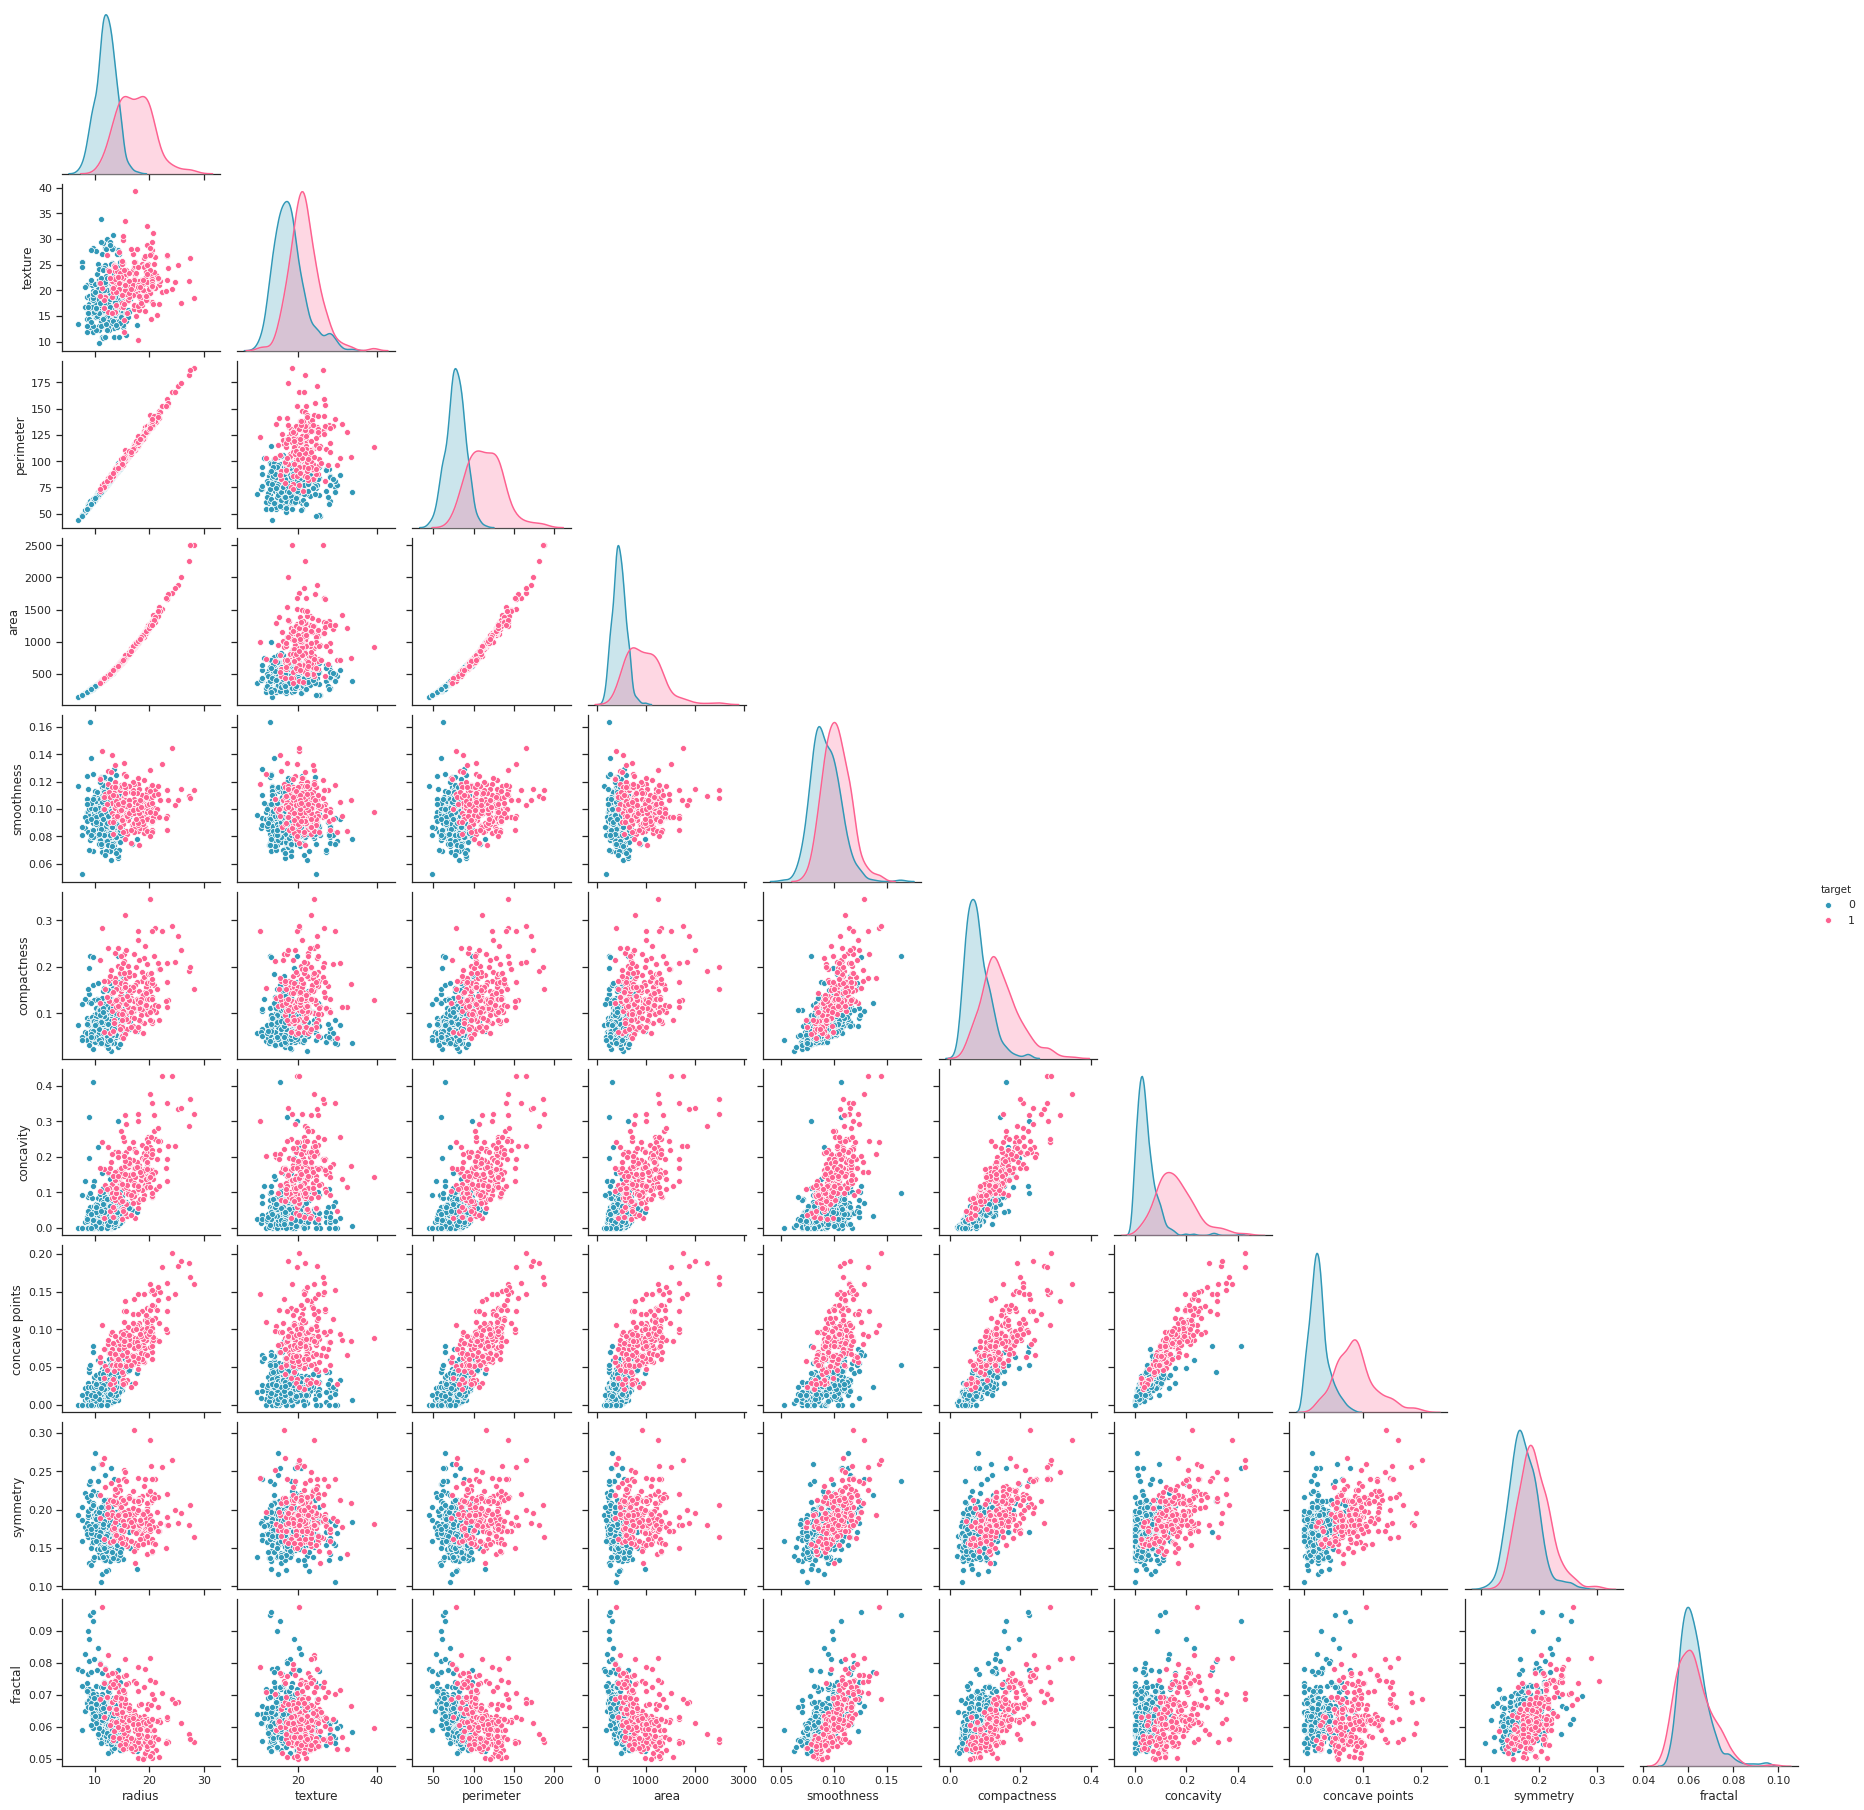

In [8]:
# Plotting the features of our dataset (this gives us density graphs and scatter plots): 

cols = ['radius', 'texture', 'perimeter', 'area','smoothness', 'compactness', 'concavity','concave points', 'symmetry', 'fractal', 'target']

df_mean = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean',
              'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','target']]
df_mean.columns = cols


sns.set(style="ticks")
sns.pairplot(df_mean[cols]
             , hue='target'
             , palette=['#3198b7', '#fd6190']
             , diag_kind = 'kde'
             #, height = 2
             , corner = True)
plt.show()

In [9]:
df['target'] = df.target.astype(str)

fig = px.scatter(df
                 , x='area_mean'
                 , y='smoothness_mean'
                 , color='target'
                 , size='perimeter_mean'
                 , color_discrete_sequence=['#fd6190', '#3198b7']
                 , title='Scatter for Area vs Smoothness (sized by Perimeter)'
                )
fig.show()

Here we can see that samples with area_mean over 1000 are all malignant.

In [10]:
fig = px.scatter(df
                 , x='concave points_mean'
                 , y=  'fractal_dimension_mean'         
                 , color='target'
                 , size='concavity_mean'
                 , color_discrete_sequence=[ '#fd6190', '#3198b7']
                 , title='Scatter for Concave Points vs Fractal Dimension (sized by Concavity)'
                )
fig.show()

In [11]:
fig = px.scatter(df
                 , x='concave points_mean'
                 , y=  'concavity_mean'     
                 , color='target'
                 , size='area_mean'
                 , color_discrete_sequence=[ '#fd6190', '#3198b7']
                 , title='Scatter for Concave Points vs Concavity (sized by Area)'
                )
fig.show()

### Boxplots  

The boxplots below are for features with suffix of MEAN, SE and WORST. You can select a feature from dropdown menu to explore ditributions.

In [12]:
# Boxplot with dropdown menu for Mean Features:

fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.radius_mean[df.target=='0'], name='Radius (0)', fillcolor='#3198b7'))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.radius_mean[df.target=='1'], name='Radius (1)', fillcolor='#fd6190'))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.texture_mean[df.target=='0'], name='Texture (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.texture_mean[df.target=='1'], name='Texture (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.perimeter_mean[df.target=='0'], name='Perimeter (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.perimeter_mean[df.target=='1'], name='Perimeter (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.area_mean[df.target=='0'], name='Area (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.area_mean[df.target=='1'], name='Area (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.smoothness_mean[df.target=='0'], name='Smoothness (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.smoothness_mean[df.target=='1'], name='Smoothness (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.compactness_mean[df.target=='0'], name='Compactness (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.compactness_mean[df.target=='1'], name='Compactness (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.concavity_mean[df.target=='0'], name='Concavity (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.concavity_mean[df.target=='1'], name='Concavity (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.fractal_dimension_mean[df.target=='0'], name='Fractal Dimention (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.fractal_dimension_mean[df.target=='1'], name='Fractal Dimention (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.symmetry_mean[df.target=='0'], name='Symmetry (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box( x=df.target[df.target=='1'], y=df.symmetry_mean[df.target=='1'], name='Symmetry (1)', fillcolor='#fd6190', visible=False))  


# Add Buttons

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([ 
                
                dict(label='Radius',
                     method='update',
                     args=[{'visible': [True, True, False, False, False, False,False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Radius)"}]),
                
                dict(label='Texture',
                     method='update',
                     args=[{'visible': [False, False, True, True, False, False,False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Texture)"}]),
                
                dict(label='Perimeter',
                     method='update',
                     args=[{'visible': [False, False, False, False, True, True, False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Perimeter)"}]),
                
                dict(label='Area',
                     method='update',
                     args=[{'visible': [False, False, False, False,False, False, True, True, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Area)"}]),
                
                dict(label='Smoothness',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False,True, True, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Smoothness)"}]),
                
                dict(label='Compactness',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, True, True, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Compactness)"}]),
                
                dict(label="Concavity",
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False ,False, False, False, False, True, True, False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Concavity)"}]),
                
                dict(label='Fractal Dimention',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, False, False,False, False, True, True, False, False]},
                           {"title": "Boxplot for Malignant & Benign (MEAN Fractal Dimention)"}]),
                
                dict(label='Symmetry',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                           {'title': "Boxplot for Malignant & Benign (MEAN Symmetry)"}]),                

            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Boxplot for Malignant & Benign (MEAN Features)")

fig.show()

In [13]:
# Boxplot with dropdown menu for SE Features:

fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.radius_se[df.target=='0'], name='Radius (0)', fillcolor='#3198b7'))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.radius_se[df.target=='1'], name='Radius (1)', fillcolor='#fd6190'))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.texture_se[df.target=='0'], name='Texture (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.texture_se[df.target=='1'], name='Texture (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.perimeter_se[df.target=='0'], name='Perimeter (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.perimeter_se[df.target=='1'], name='Perimeter (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.area_se[df.target=='0'], name='Area (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.area_se[df.target=='1'], name='Area (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.smoothness_se[df.target=='0'], name='Smoothness (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.smoothness_se[df.target=='1'], name='Smoothness (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.compactness_se[df.target=='0'], name='Compactness (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.compactness_se[df.target=='1'], name='Compactness (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.concavity_se[df.target=='0'], name='Concavity (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.concavity_se[df.target=='1'], name='Concavity (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.fractal_dimension_se[df.target=='0'], name='Fractal Dimention (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.fractal_dimension_se[df.target=='1'], name='Fractal Dimention (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.symmetry_se[df.target=='0'], name='Symmetry (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.symmetry_se[df.target=='1'], name='Symmetry (1)', fillcolor='#fd6190', visible=False))  


# Add Buttons

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([ 
                
                dict(label='Radius',
                     method='update',
                     args=[{'visible': [True, True, False, False, False, False,False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (SE Radius)"}]),
                
                dict(label='Texture',
                     method='update',
                     args=[{'visible': [False, False, True, True, False, False,False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (SE Texture)"}]),
                
                dict(label='Perimeter',
                     method='update',
                     args=[{'visible': [False, False, False, False, True, True, False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (SE Perimeter)"}]),
                
                dict(label='Area',
                     method='update',
                     args=[{'visible': [False, False, False, False,False, False, True, True, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (SE Area)"}]),
                
                dict(label='Smoothness',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False,True, True, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (SE Smoothness)"}]),
                
                dict(label='Compactness',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, True, True, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (SE Compactness)"}]),
                
                dict(label="Concavity",
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False ,False, False, False, False, True, True, False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (SE Concavity)"}]),
                
                dict(label='Fractal Dimention',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, False, False,False, False, True, True, False, False]},
                           {"title": "Boxplot for Malignant & Benign (SE Fractal Dimention)"}]),
                
                dict(label='Symmetry',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                           {'title': "Boxplot for Malignant & Benign (SE Symmetry)"}]),
                

            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Boxplot for Malignant & Benign (SE Features)")

fig.show()

In [14]:
# Boxplot with dropdown menu for WORST Features:

fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.radius_worst[df.target=='0'], name='Radius (0)', fillcolor='#3198b7'))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.radius_worst[df.target=='1'], name='Radius (1)', fillcolor='#fd6190'))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.texture_worst[df.target=='0'], name='Texture (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.texture_worst[df.target=='1'], name='Texture (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.perimeter_worst[df.target=='0'], name='Perimeter (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.perimeter_worst[df.target=='1'], name='Perimeter (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.area_worst[df.target=='0'], name='Area (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.area_worst[df.target=='1'], name='Area (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.smoothness_worst[df.target=='0'], name='Smoothness (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.smoothness_worst[df.target=='1'], name='Smoothness (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.compactness_worst[df.target=='0'], name='Compactness (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.compactness_worst[df.target=='1'], name='Compactness (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.concavity_worst[df.target=='0'], name='Concavity (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.concavity_worst[df.target=='1'], name='Concavity (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.fractal_dimension_worst[df.target=='0'], name='Fractal Dimention (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.fractal_dimension_worst[df.target=='1'], name='Fractal Dimention (1)', fillcolor='#fd6190', visible=False))  

fig.add_trace(
    go.Box(x=df.target[df.target=='0'], y=df.symmetry_worst[df.target=='0'], name='Symmetry (0)', fillcolor='#3198b7', visible=False))
fig.add_trace(
    go.Box(x=df.target[df.target=='1'], y=df.symmetry_worst[df.target=='1'], name='Symmetry (1)', fillcolor='#fd6190', visible=False))  


# Add Buttons

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([ 
                
                dict(label='Radius',
                     method='update',
                     args=[{'visible': [True, True, False, False, False, False,False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (WORST Radius)"}]),
                
                dict(label='Texture',
                     method='update',
                     args=[{'visible': [False, False, True, True, False, False,False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (WORST Texture)"}]),
                
                dict(label='Perimeter',
                     method='update',
                     args=[{'visible': [False, False, False, False, True, True, False, False, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (WORST Perimeter)"}]),
                
                dict(label='Area',
                     method='update',
                     args=[{'visible': [False, False, False, False,False, False, True, True, False, False, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (WORST Area)"}]),
                
                dict(label='Smoothness',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False,True, True, False, False, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (WORST Smoothness)"}]),
                
                dict(label='Compactness',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, True, True, False, False,False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (WORST Compactness)"}]),
                
                dict(label="Concavity",
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False ,False, False, False, False, True, True, False, False, False, False]},
                           {'title': "Boxplot for Malignant & Benign (WORST Concavity)"}]),
                
                dict(label='Fractal Dimention',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, False, False,False, False, True, True, False, False]},
                           {"title": "Boxplot for Malignant & Benign (WORST Fractal Dimention)"}]),
                
                dict(label='Symmetry',
                     method='update',
                     args=[{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                           {'title': "Boxplot for Malignant & Benign (WORST Symmetry)"}]),
                

            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Boxplot for Malignant & Benign (WORST Features)")

fig.show()

### Correlation Matrix

In [15]:
# Correlation matrix for Wisconsin dataset features:
df['target'] = df.target.astype(int)

corr = df.corr()

fig = go.Figure(data=go.Heatmap(
                   z=corr
                 , x=df.columns
                 , y=df.columns
                 , hoverongaps = False
                 , colorscale= 'Sunsetdark'
))

fig.update_layout(title='Correlation for Features of Wisconsin Dataset')


fig.show()

We can see that correlation between some features is strong positive such as 0.97, 0.96, 0.94 (highlited by dark red). 

## Model Training and Finding a Problem Solution 

In [16]:
# Define input values, or X by dropping the target values:
X = df.drop(['target'], axis = 1)

# Define output values - this is the target:
y = df['target']

###### Splitting the data into a training and testing set: 

In [17]:
# For splitting data we will be using train_test_split from sklearn:
from sklearn.model_selection import train_test_split

In [18]:
# Splitting the data into test and train, we are testing on 0.2 = 20% of dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will be using a simple SVC (Support Vector Classification) model. 

In [19]:
# Imports for training data:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()

In [20]:
# Training the model:
model.fit(X_train,y_train)

SVC()

### Evaluating the Model 

In [21]:
# Precictions for X_test:
y_predict = model.predict(X_test)

In [22]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [23]:
p = confusion_matrix(y_test,y_predict)

q = ['0', '1']
r = ['0', '1']

# change each element of z to type string for annotations
z_text = [[str(r) for r in q] for q in p]

# set up figure 
fig = ff.create_annotated_heatmap(p, x=q, y=r, annotation_text=z_text, colorscale='Portland')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()


Our model has predicted 6 False Negative values, this means that 6 women with malignant sample haven't been detected. In this case we would rather prefer 6 False Positive outcomes and 0 False Negative. 

The reason is simple, women with False Positive sample would be detected and would go for further tests, but False Negative have cancer and their desease is not detected.

### Improving the Model 

In [24]:
# Perform normalisation:
minx = X.min()
rangex = (X - minx).max()
X_scaled = (X - minx)/rangex

In [25]:
# Splitting the data into test and train, we are testing on 0.2 = 20% of dataset:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

By normalising the data, we will rescale each of the columns as we can see on our scatterplots below. As we can see on Normalized graph, x and y axis are between 0 and 1.

In [26]:
fig = px.scatter(X_train
                 , x='area_mean'
                 , y=  'smoothness_mean'     
                 , color=y_train.astype(str)
                 , color_discrete_sequence=[  '#3198b7', '#fd6190']
                 , title='Training data (Not Normalised)'
                )
fig.show()

In [27]:
fig = px.scatter(X_train_scaled
                 , x='area_mean'
                 , y='smoothness_mean'     
                 , color=y_train.astype(str)
                 , color_discrete_sequence=[  '#3198b7', '#fd6190']
                 , title='Training data (Normalised)'
                )
fig.show()

In [28]:
# Training the model:
model.fit(X_train_scaled,y_train)

SVC()

In [29]:
y_predict = model.predict(X_test_scaled)

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [31]:
p = confusion_matrix(y_test,y_predict)

q = ['0', '1']
r = ['0', '1']

# change each element of z to type string for annotations
z_text = [[str(r) for r in q] for q in p]

# set up figure 
fig = ff.create_annotated_heatmap(p, x=q, y=r, annotation_text=z_text, colorscale='Portland')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

By performing normalisation we got a model accuracy of ~97%.  To improve further we can also try to optimise C and gamma parameters or train model on more data. In first model, we predicted 6 False Negative women, who's sample was actually malignant. Second model improved slightly, since we predicted False Negative samles at only 2 women. 

Our aim would be to predict 0 False Negative, so all women with cancer would get detected and those predicted False Positive would get checked.

## **If you like my work, please show your appreciation by upvoting. :)**